In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

errD = errD_real + errD_fake

output = netD(fake)  
errG = criterion(output, real_label)

In [2]:
f = open("./logs/flow_gan.log")

loss_d = []
loss_g = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'Loss_D':
            loss_d.append(float(v))
        elif k == 'Loss_G':
            loss_g.append(float(v))

loss_d = np.array(loss_d)
loss_g = np.array(loss_g)

FileNotFoundError: [Errno 2] No such file or directory: './logs/flow_gan.log'

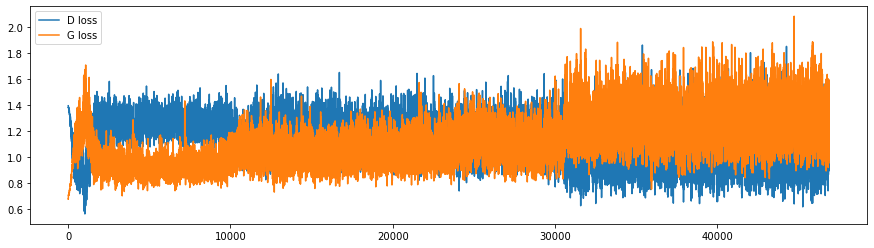

In [64]:
x = np.arange(len(loss_d))

f = plt.figure(figsize=(15,4))
l1, = plt.plot(x, loss_d, label='D loss')
l2, = plt.plot(x, loss_g, label='G loss')

plt.legend(handles=[l1, l2])

In [8]:
f = open("../real-nvp/realnvp_log.log")

loss = []
loss_val = []
l = []
l_val = []

for i in f:
    information = re.split("INFO ", i, 2)[1]
    entries = re.split(', ', information)
    flag_val = 0
    for e in entries:
        k, v = re.split(': ', e)
        if k == 'loss':
            loss.append(float(v))
            flag_val = 0
        elif k == 'val_loss':
            loss_val.append(float(v))
            flag_val = 1
        elif k == 'likelihood':
            if flag_val:
                l_val.append(float(v))
            else:
                l.append(float(v))

loss = np.array(loss)

(0.0, 50.0, 0.0, 20000.0)

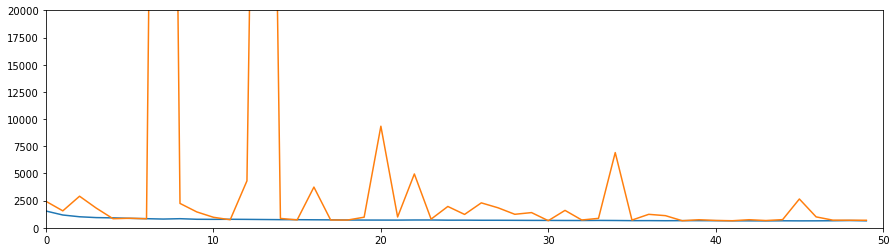

In [13]:
x = np.arange(len(loss))

f = plt.figure(figsize=(15,4))
plt.plot(x, loss)
plt.plot(x, loss_val)
plt.axis([0, 50, 0, 20000])

(0.0, 50.0, -10000.0, 0.0)

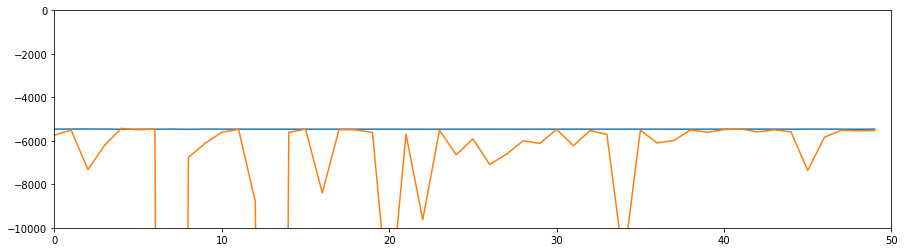

In [14]:
f = plt.figure(figsize=(15,4))
plt.plot(x, l)
plt.plot(x, l_val)
plt.axis([0, 50, -10000, 0])